In [197]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.datasets import load_digits
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
import random

nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [198]:
predizione = model.predict(xtest)

In [199]:
df = pd.DataFrame(predizione,columns=['esito'])

In [200]:
print(df['esito'])
print(ytest)

0      1
1      0
2      0
3      1
4      1
      ..
195    1
196    0
197    0
198    0
199    0
Name: esito, Length: 200, dtype: int32
[1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1]


In [201]:
print(accuracy_score(ytest, predizione))

0.975


# Esempio con clustering

In [202]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [203]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1500, 2)
(1500,)
[1 1 0 ... 2 2 2]


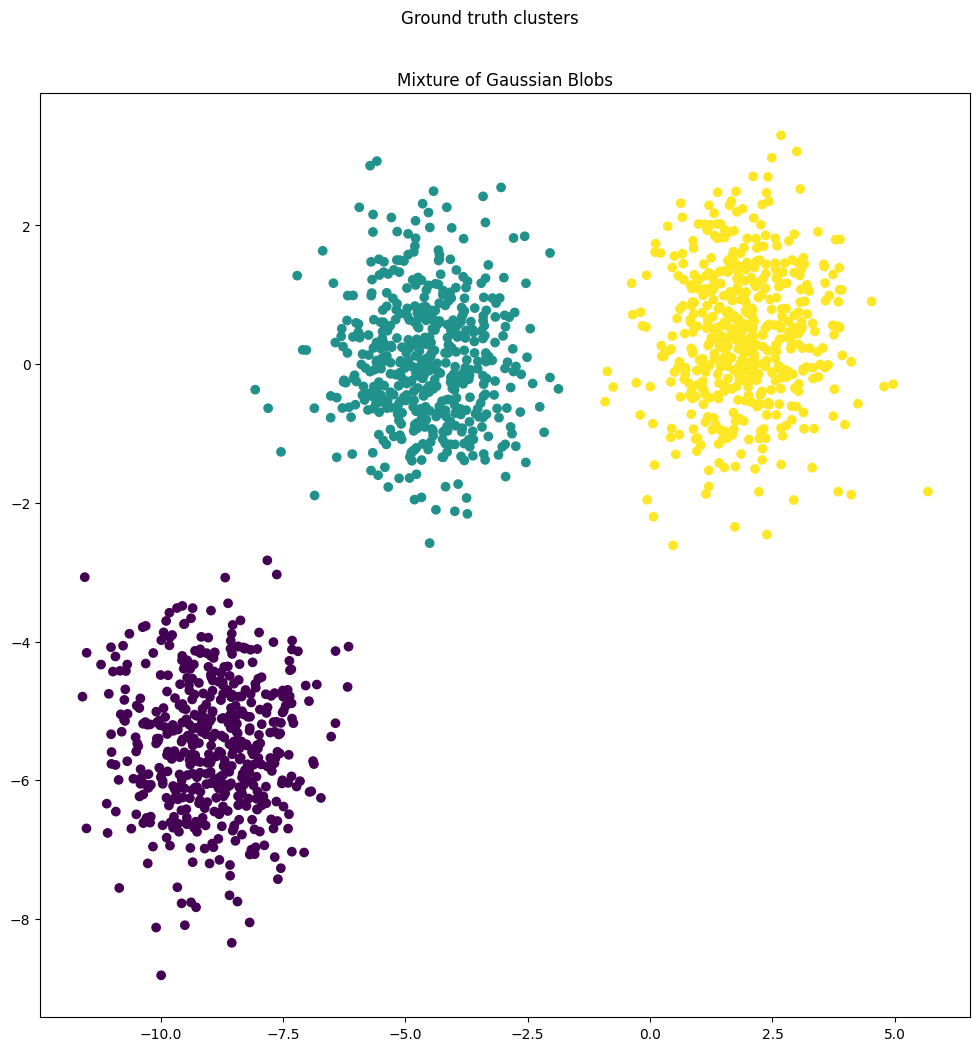

In [204]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

axs.scatter(X[:, 0], X[:, 1], c=y)
axs.set_title("Mixture of Gaussian Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


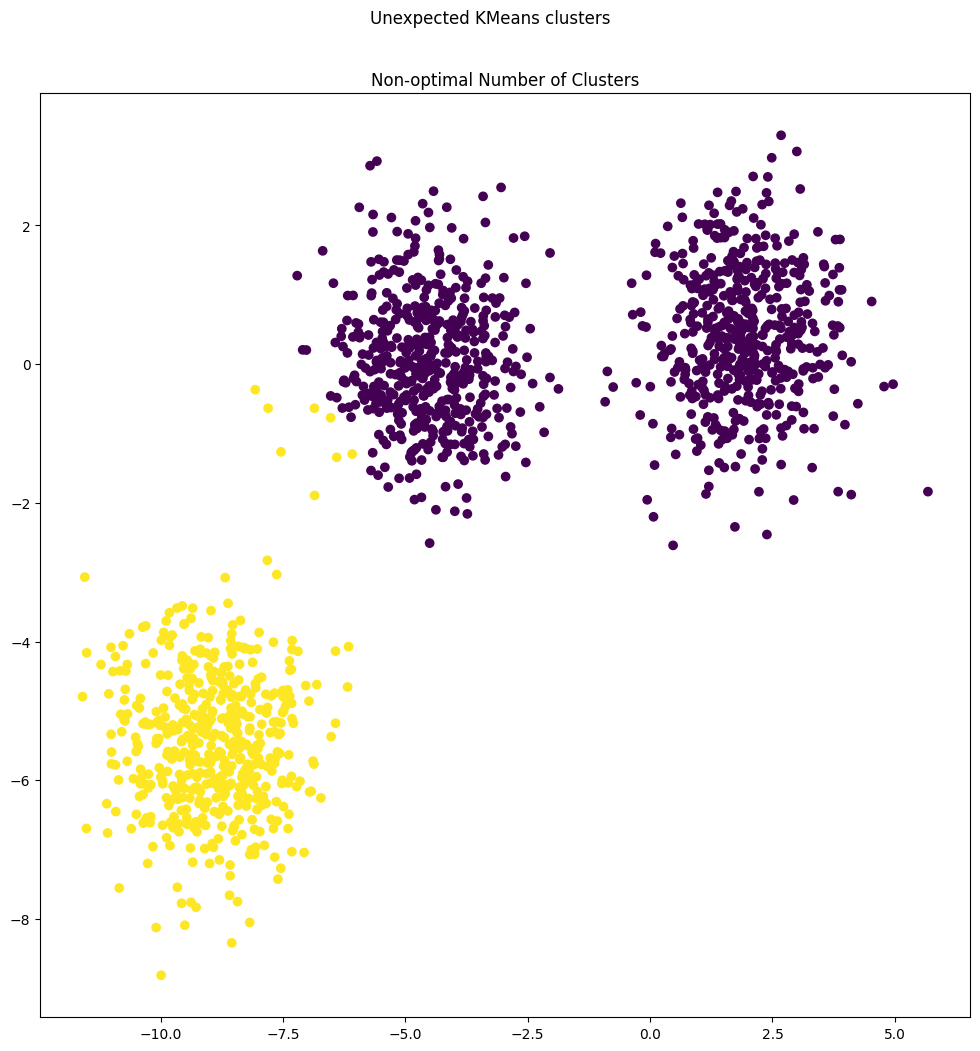

In [205]:

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

y_pred = KMeans(n_clusters=2).fit_predict(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.set_title("Non-optimal Number of Clusters")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


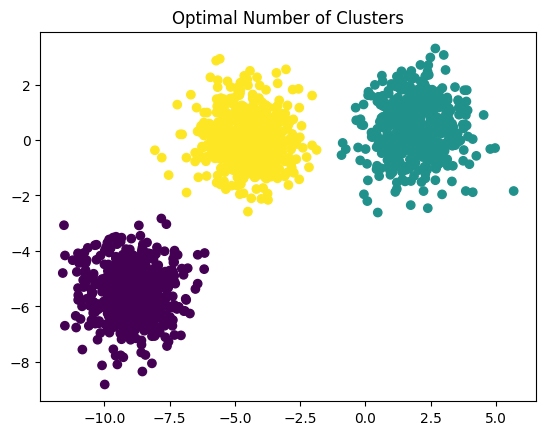

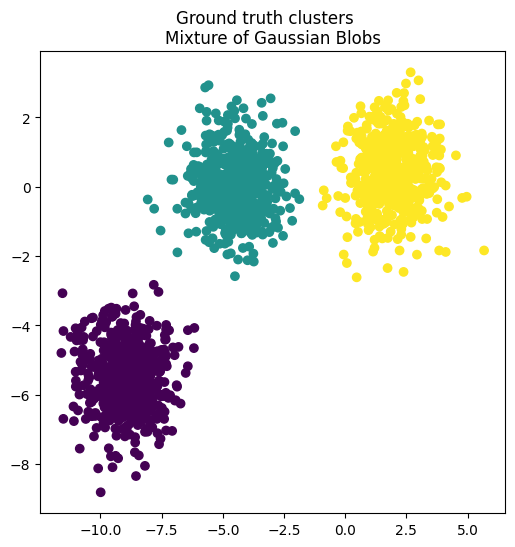

In [206]:
y_pred = KMeans(n_clusters=3,random_state=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

axs.scatter(X[:, 0], X[:, 1], c=y)
axs.set_title("Mixture of Gaussian Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

In [207]:
print(accuracy_score(y, y_pred))

0.3333333333333333


Cluster 1 associato alla classe 2
Cluster 2 associato alla classe 1


c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


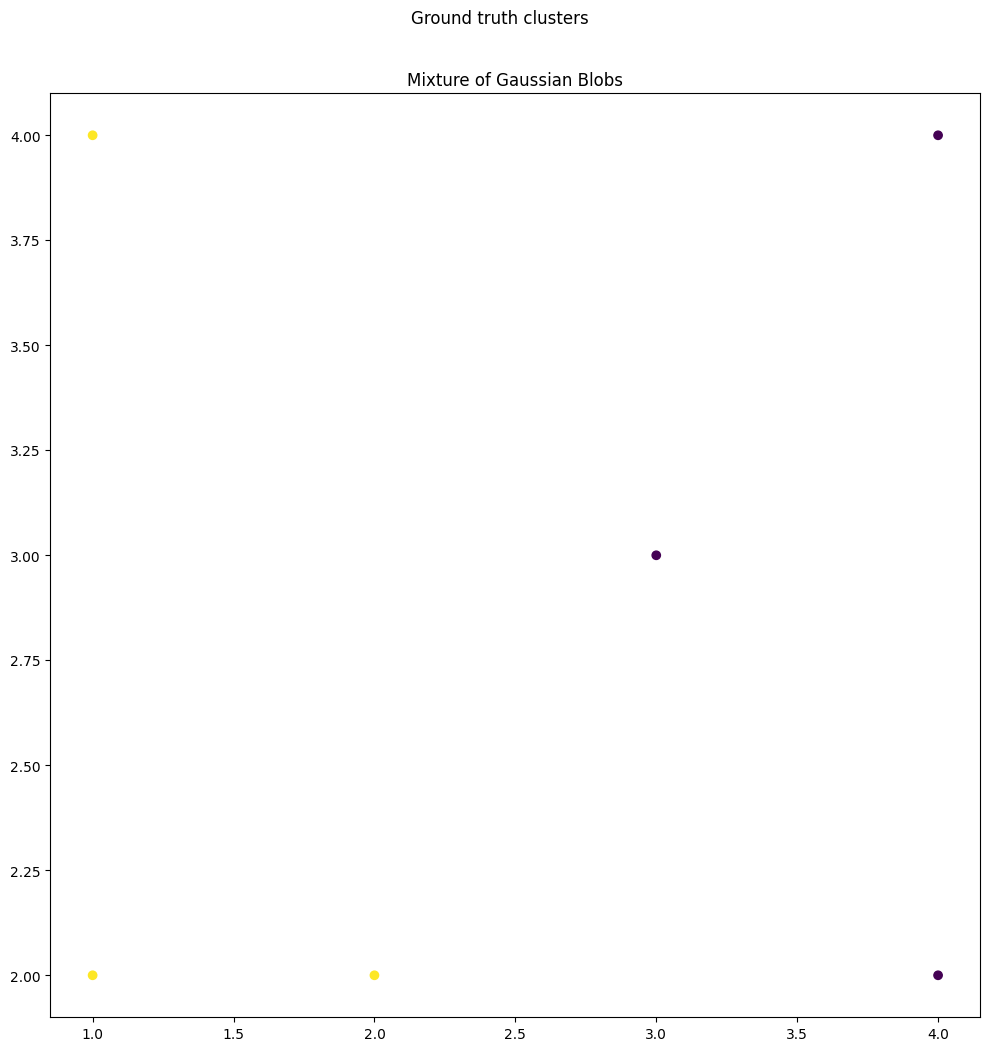

In [208]:
# Esempio di dati e classi
data_mapping = [[1, 2], [1, 4], [4, 2], [4, 4], [2, 2], [3, 3]]
classes = [1, 1, 2, 2, 1, 2]
 
# Creazione del modello di clustering (K-Means)
k = 2  # Numero di cluster desiderato
kmeans = KMeans(n_clusters=k)
 
# Esecuzione del clustering
kmeans.fit(data_mapping)
 
# Associazione dei cluster alle classi
cluster_labels = kmeans.labels_
for i in range(k):
    cluster_indices = [index for index, label in enumerate(cluster_labels) if label == i]
    class_counts = [classes[index] for index in cluster_indices]
    most_common_class = max(set(class_counts), key=class_counts.count)
    print(f"Cluster {i+1} associato alla classe {most_common_class}")

'''plt.scatter(data[:,0], data[:,1], c=cluster_labels)
plt.title("Optimal Number of Clusters")
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))'''

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

axs.scatter(np.array(data_mapping)[:,0], np.array(data_mapping)[:,1], c=cluster_labels)
axs.set_title("Mixture of Gaussian Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

In [209]:
print(np.array(data_mapping)[:,1])

[2 4 2 4 2 3]


In [210]:
data, labels = make_blobs(n_samples=n_samples, random_state=random_state) #load_digits(return_X_y=True)
print(labels.shape)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """

    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    #print(type(estimator))
    results = [name, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        #metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.accuracy_score
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}s\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t\t{:.3f}"
    )
    print(formatter_result.format(*results))

(1500,)
# digits: 3; # samples: 1500; # features 2


In [211]:
print(82 * "_")
print("init\t\tinertia\tcompl\tv-meas\tARI\tAMI\tsilhouette\taccuracy")

kmeans = KMeans(n_clusters=20)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(n_clusters=3)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

'''pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)'''

print(82 * "_")

__________________________________________________________________________________
init		inertia	compl	v-meas	ARI	AMI	silhouette	accuracy
k-means++s	48.904	0.374	0.545	0.208	0.542	0.149		0.267
random   s	240.437	1.000	1.000	1.000	1.000	0.333		0.743
__________________________________________________________________________________


c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


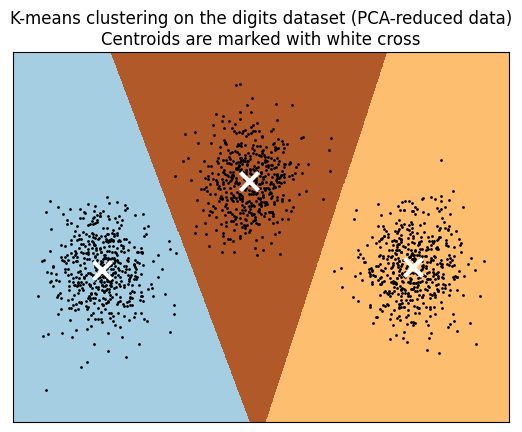

In [212]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


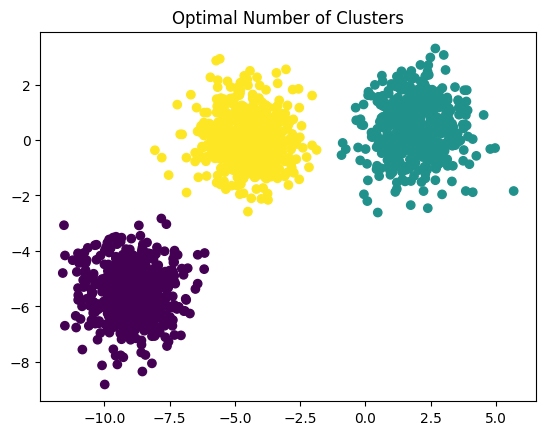

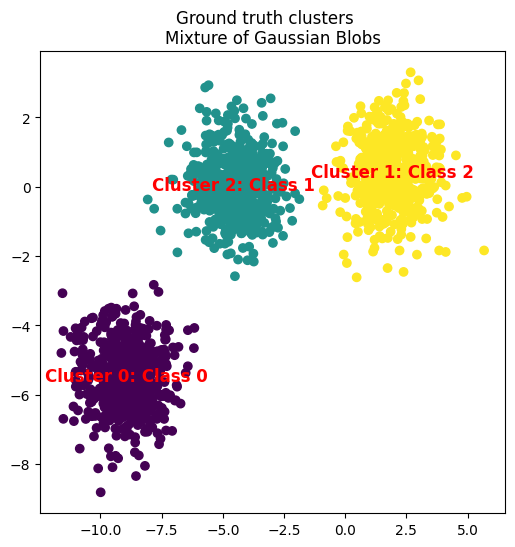

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generiamo dei dati di esempio


# Eseguiamo il clustering
n_clusters = 3  # numero di cluster
y_pred = KMeans(n_clusters=n_clusters, random_state=43).fit_predict(X)
#y=df['Label']
# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = X[y_pred == i]
    cluster_classes = y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

# Plot dei risultati
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(X[:, 0], X[:, 1], c=y)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    axs.text(
        np.mean(X[y_pred == i, 0]), np.mean(X[y_pred == i, 1]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

# Esempio con dataset di attacco

In [229]:
nome_file='Friday-02-03-2018_TrafficForML_CICFlowMeter'

with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [230]:
feature_1 = 'Fwd Pkt Len Std'
feature_2 = 'Bwd Pkt Len Max'


df = df[[feature_1, feature_2,'Label']]

In [231]:
print(df[df['Label'] == 0].shape[0]-df[df['Label'] == 1].shape[0])

472143


In [232]:
delete = []

delta = df[df['Label'] == 0].shape[0]-df[df['Label'] == 1].shape[0]

print(df[df['Label'] == 1].shape[0])

check = True

while(check):
    numb = random.randint(0,df.shape[0])
    if(numb in df.index):
        if (df['Label'].loc[numb] == 0 and delete.count(numb) == 0):
            delete.append(numb)

    if(len(delete) == delta):
        check = False

    

286191


KeyboardInterrupt: 

In [220]:
df.drop(index=delete,inplace=True)

In [221]:
print(df.shape)

(863267, 3)


In [222]:
X, y = df[[feature_1,feature_2]],df['Label']

In [223]:
# Eseguiamo il clustering

n_clusters = len(df['Label'].unique())  # numero di cluster

y_pred = KMeans(n_clusters=n_clusters).fit_predict(X)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = X[y_pred == i]
    cluster_classes = y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


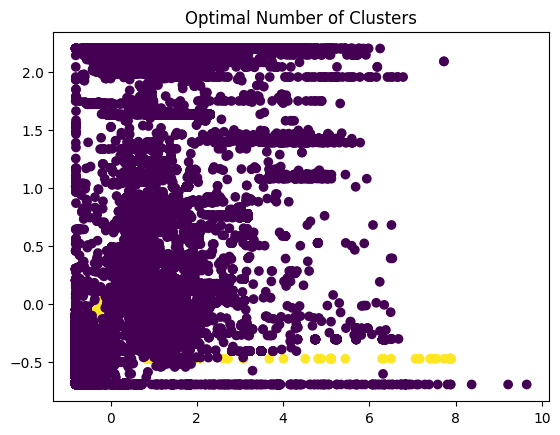

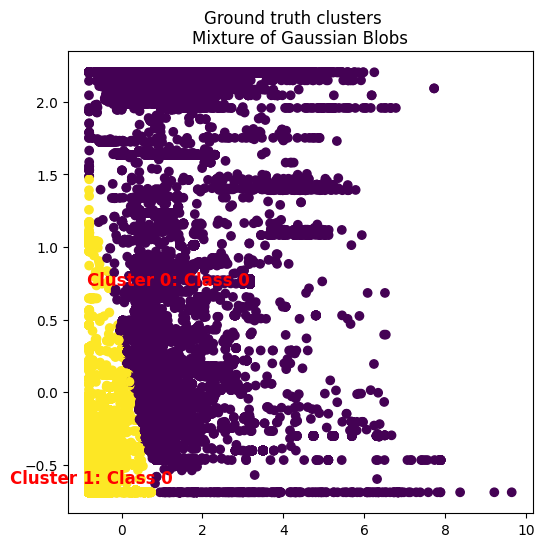

In [224]:
# Plot dei risultati
plt.scatter(X[feature_1], X[feature_2], c=y)
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(X[feature_1], X[feature_2], c=y_pred)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    axs.text(
        np.mean(X[feature_1][y_pred == i]), np.mean(X[feature_2][y_pred == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()